# Task 1 Baseline Notebook: Simple Regression Model

Welcome to the **Puerto Rico National Olympiad of Artificial Intelligence 2025**!

In this task, your goal is to **predict a continuous variable (target)** based on three input features using **supervised machine learning**.

- You are given:
  - `task1.ipynb`: a baseline jupyter notebook (Python) that serves as a starting point to solve the task.
  - `train_task1.csv`: a dataset of 150 entries with 3 features and the corresponding target value.
  - `eval_task1.csv`: a dataset of 75 entries with the same 3 features, but without the target. Each row has a unique `id`.
- Your task is to:
  1. **Train a regression model** using the training dataset.
  2. **Predict the target values** for the evaluation dataset.
  3. **Export your predictions** to a CSV file with two columns: `id` and `prediction`.

You will **submit your predictions**, and the organizers will evaluate how close they are to the real (hidden) targets using the **Mean Squared Error (MSE)** metric.


## Step 0. Load Data

In [50]:
import pandas as pd

# Load training data (features and target)
train_df = pd.read_csv("train_task1.csv")
print("Training data:")
display(train_df)

# Load test data (features only)
eval_df = pd.read_csv("eval_task1.csv")
print("\nEvaluation data:")
display(eval_df)

Training data:


,feature_1,feature_2,feature_3,target
0,10.915069,12.460852,-20.733902,-19.141879
1,-3.276621,-3.921082,-14.635149,-18.288714
2,2.088636,-19.596701,-13.281860,11.750665
3,4.040509,18.861859,1.745778,9.447020
4,-8.084936,-5.017570,9.154021,16.319113
...,...,...,...,...
145,3.241664,-1.301431,0.969960,-4.603974
146,-1.156483,-3.011037,-14.785220,5.785587
147,1.990597,-6.002169,0.698021,24.251162
148,-3.845555,10.062928,-5.768919,-5.865601



Evaluation data:


,id,feature_1,feature_2,feature_3
0,1,3.756980,-6.006387,-2.916937
1,2,11.677821,2.544208,3.376027
2,3,5.193465,15.327389,-1.087601
3,4,4.714684,18.820245,13.454200
4,5,-13.044695,6.696725,3.665982
...,...,...,...,...
70,71,-11.246421,-15.341142,12.776768
71,72,6.228499,-10.676204,-1.423795
72,73,3.853174,-8.838574,1.537251
73,74,20.607479,17.553408,-2.489641



## Step 1: Prepare the data

We'll separate the features and the target for training.  
The evaluation data only has features and an ID — we'll use those features to predict the target.


In [51]:
# Separate features and target
X_train_full = train_df[['feature_1', 'feature_2', 'feature_3']]
y_train_full = train_df['target']

# Extract test features and IDs
X_eval = eval_df[['feature_1', 'feature_2', 'feature_3']]
eval_ids = eval_df['id']

## (Solution Step 1) Lets conduct an Exploratory Data Analysis (EDA) for the data sets.

### 1.1 - Check for missing data

In [52]:
print("Missing values in train_df:")
print(train_df.isnull().sum())
print("\nMissing values in eval_df:")
print(eval_df.isnull().sum())

Missing values in train_df:
feature_1    0
feature_2    0
feature_3    0
target       0
dtype: int64

Missing values in eval_df:
id           0
feature_1    0
feature_2    0
feature_3    0
dtype: int64


### 1.2 - Basic statistics

In [53]:
print("\ntrain_df.describe():")
print(train_df.describe())
print("\neval_df.describe():")
print(eval_df.describe())


train_df.describe():
        feature_1   feature_2   feature_3      target
count  150.000000  150.000000  150.000000  150.000000
mean     0.396344   -1.937466   -0.361709    0.360560
std      9.272205    9.880620   10.197622   10.705205
min    -23.019212  -32.412673  -22.111353  -26.334473
25%     -6.496251   -8.200669   -7.550360   -6.682923
50%      0.475493   -2.155642    0.134656   -0.697485
75%      5.022134    5.584344    6.241782    6.642517
max     25.733598   30.788808   27.201692   30.537858

eval_df.describe():
              id  feature_1  feature_2  feature_3
count  75.000000  75.000000  75.000000  75.000000
mean   38.000000   1.588073  -0.389866   1.568436
std    21.794495   8.479657  10.403556  10.948427
min     1.000000 -18.048821 -21.238957 -26.509698
25%    19.500000  -4.301295  -8.940870  -3.686747
50%    38.000000   2.449666  -0.209016   0.993323
75%    56.500000   6.242586   7.460882   8.610196
max    75.000000  21.221562  23.146586  38.527315


### 1.3 - Correlation matrix

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

corr = train_df.corr()
print("\nCorrelation matrix:")
print(corr)

#plt.figure(figsize=(6,4))
#sns.heatmap(corr, annot=True, cmap='coolwarm')
#plt.title("Correlation Matrix (train_df)")
#plt.show()


Correlation matrix:
           feature_1  feature_2  feature_3    target
feature_1   1.000000  -0.060651  -0.090621  0.030686
feature_2  -0.060651   1.000000  -0.088936 -0.155283
feature_3  -0.090621  -0.088936   1.000000  0.464879
target      0.030686  -0.155283   0.464879  1.000000


### 1.4 - Pairplot to visualize relationships and noise


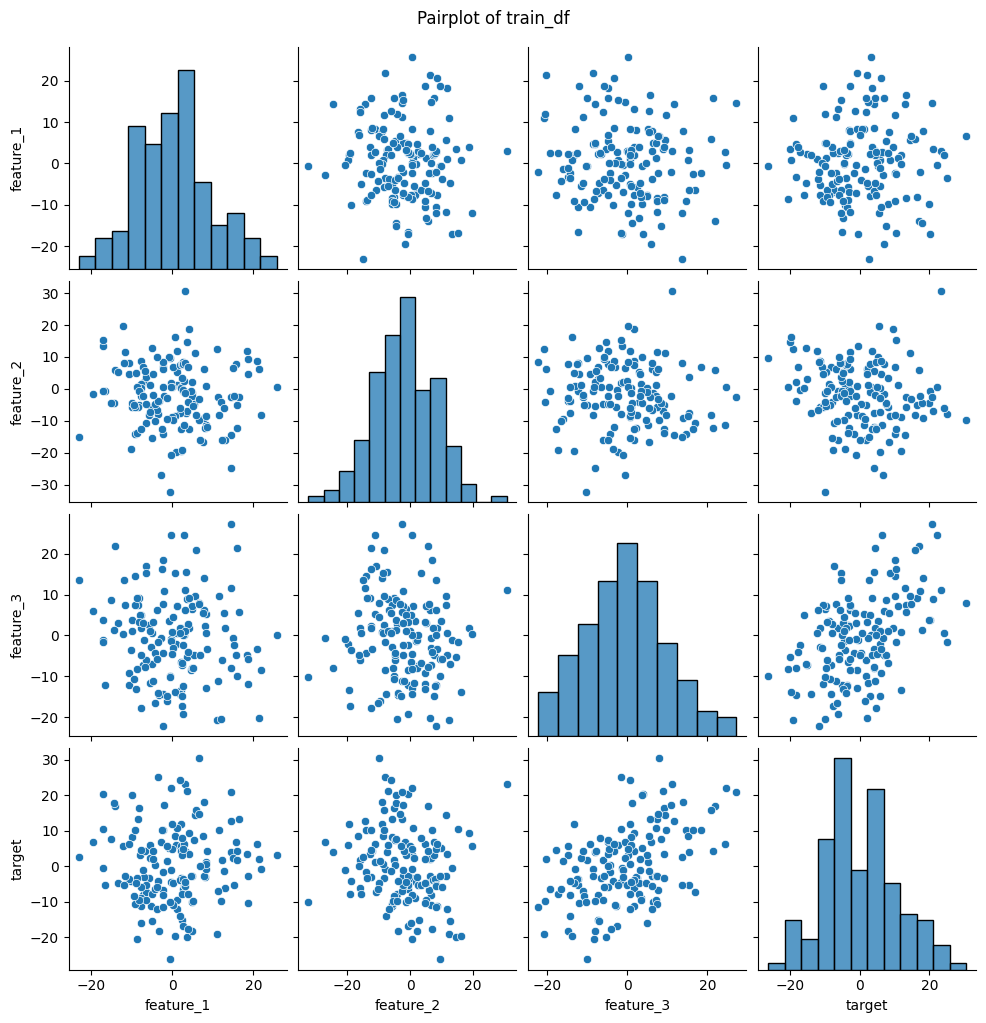

In [55]:
sns.pairplot(train_df)
plt.suptitle("Pairplot of train_df", y=1.02)
plt.show()

### 1.5 - Check for outliers in features and target

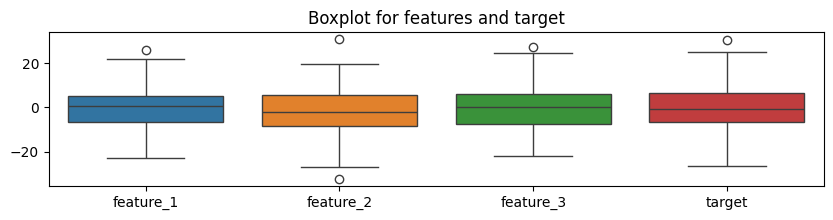

In [56]:
plt.figure(figsize=(10,2))
sns.boxplot(data=train_df[['feature_1', 'feature_2', 'feature_3', 'target']])
plt.title("Boxplot for features and target")
plt.show()

## Step 2: Evaluate your model before submitting

Before using the evaluation dataset, let's split our training data into a smaller training set and a validation set.
This helps us understand how well the model might perform on unseen data — just like in the real evaluation.

We'll use **Linear Regression**, a common starting point in machine learning and we will use **80% for training** and **20% for testing**.

----
**Stop here**

The procedure below creates a very simple model that will not generate the best results. If you want to improve your score try some of the following ideas:
- Try more powerful models like `RandomForestRegressor`, `GradientBoostingRegressor`, or `SVR`. See [Machine Learning Map](https://scikit-learn.org/stable/machine_learning_map.html).
- Use feature transformations like polynomial features or normalization. See [Dataset Transformations](https://scikit-learn.org/stable/data_transforms.html).
- Tune model hyperparameters. For this see the documentation for each model.
---

In [57]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Split the original training data
X_train, X_test, y_train, y_test= train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42)

# Train the model on training subset
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate on the validation set
y_test_pred = model.predict(X_test)
test_mse = mean_squared_error(y_test, y_test_pred)
print(f"Linear Regression Test MSE: {test_mse:.4f}")

Linear Regression Test MSE: 56.2337


## (Solution Step 2) Lets try a few methods to create a model with this noisy data (using cross-validation)

### 2.0 - Linear Regression (all features)

In [58]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# Linear Regression with 5-fold cross-validation
lr = LinearRegression()
scores = cross_val_score(lr, X_train_full, y_train_full, cv=5, scoring='neg_mean_squared_error')
print("Linear Regression 5-fold CV MSEs:", -scores)
print("Linear Regression Mean CV MSE:", -scores.mean())

Linear Regression 5-fold CV MSEs: [ 82.03387413  89.8488368  120.86387211  83.01175461  76.60527098]
Linear Regression Mean CV MSE: 90.47272172399228


### 2.1 - Linear Regression (feature_3 only)

In [59]:
lr = LinearRegression()
scores = cross_val_score(lr, X_train_full[['feature_3']], y_train_full, cv=5, scoring='neg_mean_squared_error')
print("Linear Regression (feature_3 only) 5-fold CV MSEs:", -scores)
print("Linear Regression (feature_3 only) Mean CV MSE:", -scores.mean())

Linear Regression (feature_3 only) 5-fold CV MSEs: [ 83.97806576  92.48021575 126.25280997  80.26536836  72.22599496]
Linear Regression (feature_3 only) Mean CV MSE: 91.04049096132027


### 2.2 - Random Forest

In [60]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
scores = cross_val_score(rf, X_train_full, y_train_full, cv=5, scoring='neg_mean_squared_error')
print("Random Forest 5-fold CV MSEs:", -scores)
print("Random Forest Mean CV MSE:", -scores.mean())

Random Forest 5-fold CV MSEs: [104.67870636 102.71674982 129.11450392 115.70919323  82.0543971 ]
Random Forest Mean CV MSE: 106.85471008718821


### 2.3 - Polynomial Features + Ridge Regression

In [61]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge

pipe = Pipeline([
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('ridge', Ridge(alpha=1.0))
])
scores = cross_val_score(pipe, X_train_full, y_train_full, cv=5, scoring='neg_mean_squared_error')
print("Ridge (poly features, pipeline) 5-fold CV MSEs:", -scores)
print("Ridge (poly features, pipeline) Mean CV MSE:", -scores.mean())

Ridge (poly features, pipeline) 5-fold CV MSEs: [ 83.8962801   85.99342747 126.90817022  87.19895035  93.71185587]
Ridge (poly features, pipeline) Mean CV MSE: 95.5417368000524


### 2.4 - Ridge Regression with Feature Scaling

In [62]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('ridge', Ridge(alpha=1.0))
])
scores = cross_val_score(pipe, X_train_full, y_train_full, cv=5, scoring='neg_mean_squared_error')
print("Ridge (with scaling) 5-fold CV MSEs:", -scores)
print("Ridge (with scaling) Mean CV MSE:", -scores.mean())

Ridge (with scaling) 5-fold CV MSEs: [ 81.96959255  90.13502127 120.79669644  82.82900958  76.50317797]
Ridge (with scaling) Mean CV MSE: 90.44669956180824


#### 2.4.1 - Hyperparameter tuning

In [65]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# Define the pipeline
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('ridge', Ridge())
])

# Define the hyperparameter grid for Ridge alpha
param_grid = {
    'ridge__alpha': [0.01, 0.1, 1.0, 10.0, 100.0, 500.0]
}

# Grid search with 5-fold cross-validation
grid = GridSearchCV(pipe, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid.fit(X_train_full, y_train_full)

print("Best alpha:", grid.best_params_['ridge__alpha'])
print("Best 5-fold CV MSE:", -grid.best_score_)

Best alpha: 10.0
Best 5-fold CV MSE: 90.3781505772121


### 2.5 - Support Vector Regression (SVR)

In [64]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

svr = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))
scores = cross_val_score(svr, X_train_full, y_train_full, cv=5, scoring='neg_mean_squared_error')
print("SVR 5-fold CV MSEs:", -scores)
print("SVR Mean CV MSE:", -scores.mean())

SVR 5-fold CV MSEs: [ 85.28711824 108.65122056 123.52569962  93.95012054  91.371669  ]
SVR Mean CV MSE: 100.55716559120793


## Step 3: Train your model again with all the data and make predictions on the evaluation data

In [ ]:
# Train the model
model.fit(X_train_full, y_train_full)
# Predict using the trained model
y_eval_pred = model.predict(X_eval)

LinearRegression()

## (Solution Step 3) Train using best estimator and make predictions on evaluation data

In [66]:
best_model = grid.best_estimator_
best_model.fit(X_train_full, y_train_full)
y_eval_pred = best_model.predict(X_eval)


## Step 4: Save predictions to a CSV file

We create a new DataFrame with the `id` and your model's predictions, then save it.  
Make sure your file is named `predictions_task1.csv` for submission!


In [67]:
# Create submission DataFrame
submission = pd.DataFrame({'id': eval_ids, 'prediction': y_eval_pred})

# Save to CSV
submission.to_csv("predictions_task1.csv", index=False)
print("Predictions saved to predictions_task1.csv!")

Predictions saved to predictions_task1.csv!
